In [39]:
import json
import os 
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img

In [26]:
def get_results():
    global filenames
    filenames = os.listdir(os.getcwd()+'./results/')[1:]
    results = list()
    for filename in filenames:
        with open('./results/' + filename,'r') as f:
            results.append(json.load(f))
    return results

In [27]:
def make_dataframe(results:list, idx:int):
    print("Model: ", filenames[idx].strip('.json'))
    return pd.DataFrame.from_dict(results[idx], orient='index')

In [42]:
def show_plots(metric:str, idx:int):
    folder = 'losses/' if metric=='loss' else 'accs/'
    filename = './plots/' + folder + os.listdir(os.getcwd()+'./plots/'+folder)[idx]  
    print("Model: ", re.sub(r'./plots/' + folder, '', filename.replace('.png', '')))
    image = img.imread(filename)
    plt.clf()
    plt.figure(dpi=100)
    plt.imshow(image)
    plt.show()

In [29]:
results = get_results()
print("Number of different models trained:", len(results))

Number of different models trained: 6


In [30]:
make_dataframe(results, 0)

Model:  100d_bert_avg_pos_types_single_kg


,max,agg,sel,where
dev,0.547912,0.900945,0.874507,0.676636
train,0.967593,0.983448,0.999267,0.974350


In [31]:
make_dataframe(results, 1)

Model:  100d_bert_avg_types_single_kg


,max,agg,sel,where
dev,0.538940,0.898433,0.864457,0.679387
train,0.958656,0.988900,0.998856,0.970382


In [32]:
make_dataframe(results, 2)

Model:  100d_bert_max-pool_pos_types_single_kg


,max,agg,sel,where
dev,0.543486,0.899031,0.869721,0.674841
train,0.954759,0.983716,0.998731,0.971740


In [33]:
make_dataframe(results, 3)

Model:  100d_bert_max-pool_types_single_kg


,max,agg,sel,where
dev,0.545400,0.898672,0.868286,0.675440
train,0.958137,0.987917,0.998892,0.970399


In [34]:
make_dataframe(results, 4)

Model:  100d_pos_types_single_kg


,max,agg,sel,where
dev,0.644893,0.899287,0.920665,0.775059
train,0.964900,0.979718,0.998651,0.978759


In [35]:
make_dataframe(results, 5)

Model:  100d_types_single_kg


,max,agg,sel,where
dev,0.655701,0.900831,0.930998,0.779572
train,0.973010,0.994818,0.998722,0.979150


Model:  100d_bert_avg_pos_types_single_kg


<Figure size 432x288 with 0 Axes>

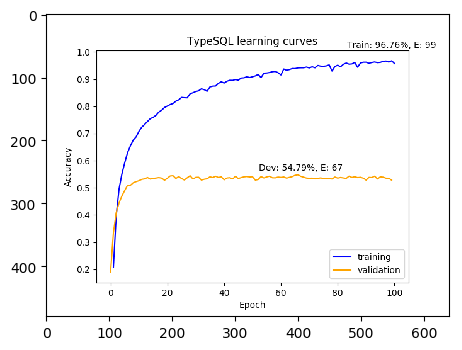

Model:  100d_bert_avg_types_single_kg


<Figure size 432x288 with 0 Axes>

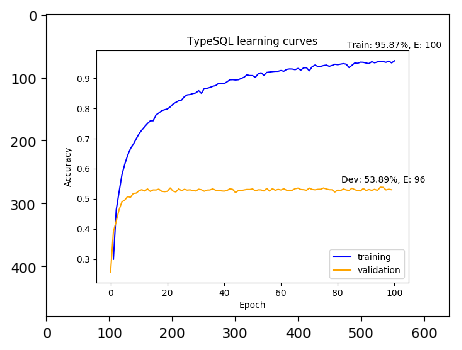

Model:  100d_bert_max-pool_pos_types_single_kg


<Figure size 432x288 with 0 Axes>

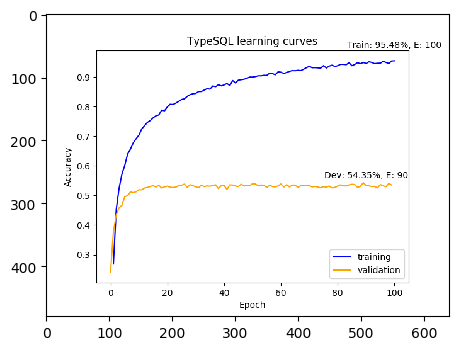

Model:  100d_bert_max-pool_types_single_kg


<Figure size 432x288 with 0 Axes>

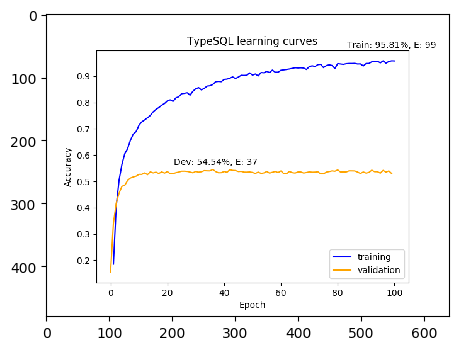

Model:  100d_pos_types_single_kg


<Figure size 432x288 with 0 Axes>

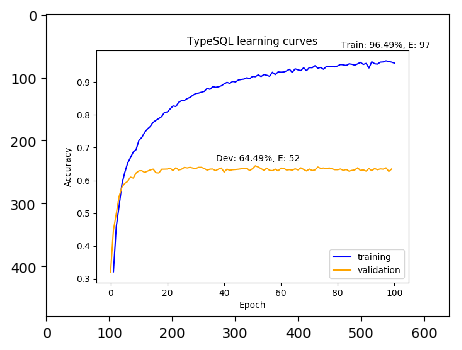

Model:  100d_types_single_kg


<Figure size 432x288 with 0 Axes>

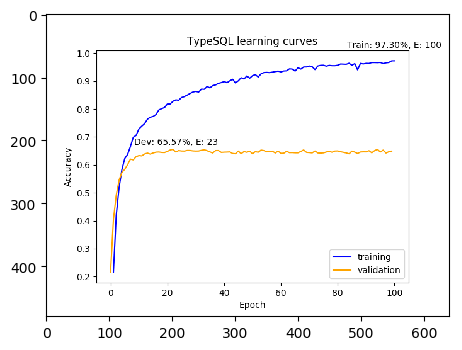

In [43]:
for i in range(len(results)):
    show_plots('acc', i)

Model:  100d_bert_avg_pos_types_single_kg


<Figure size 432x288 with 0 Axes>

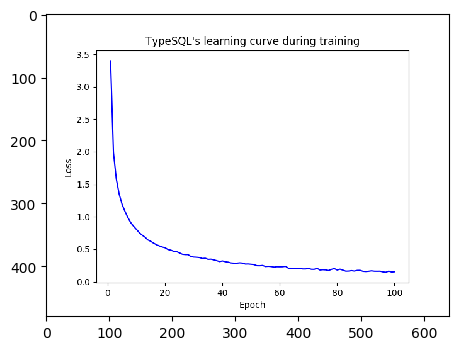

Model:  100d_bert_avg_types_single_kg


<Figure size 432x288 with 0 Axes>

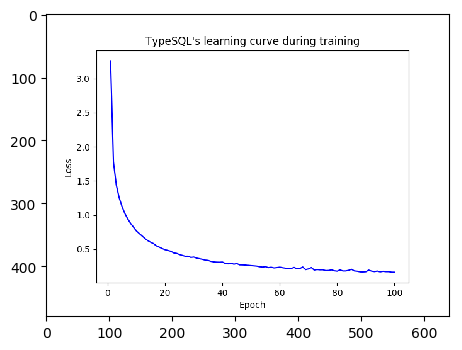

Model:  100d_bert_max-pool_pos_types_single_kg


<Figure size 432x288 with 0 Axes>

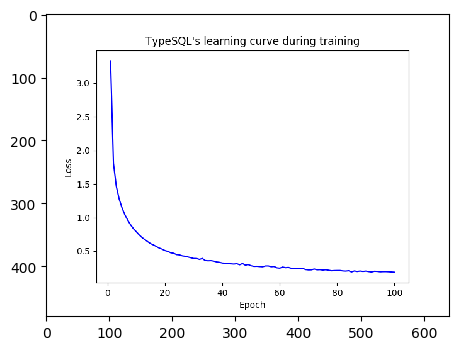

Model:  100d_bert_max-pool_types_single_kg


<Figure size 432x288 with 0 Axes>

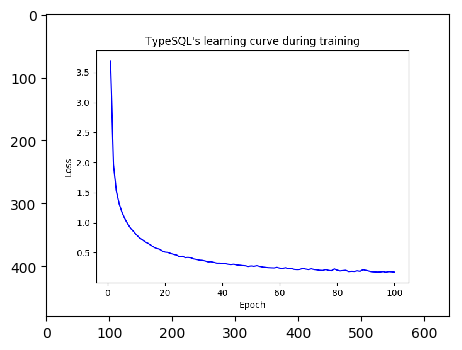

Model:  100d_pos_types_single_kg


<Figure size 432x288 with 0 Axes>

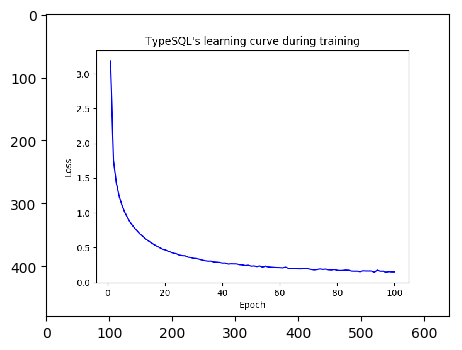

Model:  100d_types_single_kg


<Figure size 432x288 with 0 Axes>

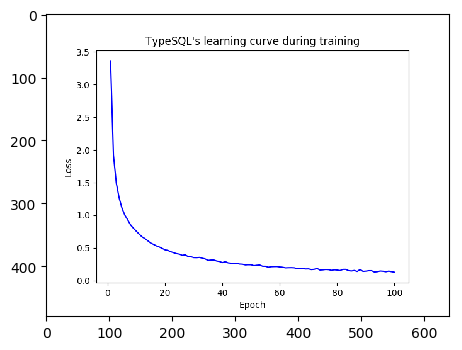

In [44]:
for i in range(len(results)):
    show_plots('loss', i)